In [5]:
import cv2
import numpy as np

#Reference
#https://www.kaggle.com/code/bulentsiyah/deep-learning-based-semantic-segmentation-keras
#https://github.com/gabrielchao/terrainclassifier


In [ ]:
ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg'

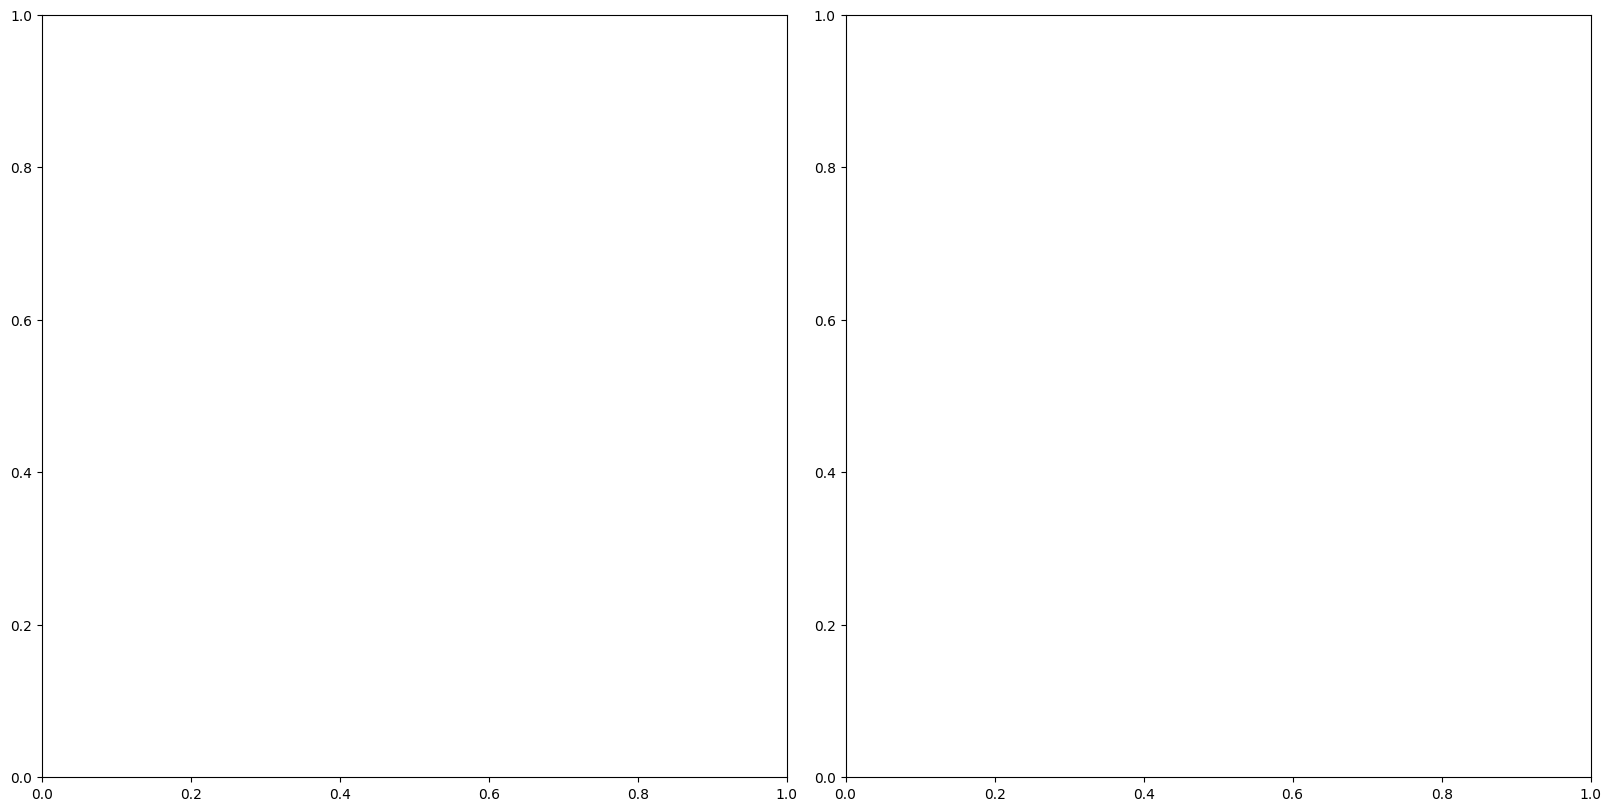

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg"
label_image_semantic = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

In [6]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 5

In [8]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = vgg_unet(n_classes=n_classes ,  input_height=416, input_width=608  )

model.train( 
    train_images =  "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/",
    train_annotations = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/",
    checkpoints_path = "vgg_unet" , epochs=epochs
)

58889256/58889256 [==============================] - 1s 0us/step
Verifying training dataset


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/'

In [ ]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-001.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start